# <center>Самостійна робота №4
## <center>Виконав: студент групи ПБ-21 мп Якобчук Євгеній
## <center>Варіант №5
## <center>Загальні завдання для всіх варіантів

1. Завантажте набір даних. Скільки всього записів у ряді?

In [1]:
import numpy
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
# Розмір графіків
plt.rcParams['figure.figsize'] = (15, 5)

data = pd.read_csv("E:/Магістр 1 курс 1 семестр/Інтелектуальні та інформаційні системи ІТ/Практикуми і самостійні/Пр4/yahoo_stock2.csv - yahoo_stock2.csv.csv", sep=",")

In [2]:
data.shape

(1825, 2)

Всього маємо 1825 рядків.

2. Виведіть заголовок та останні 5 записів таблиці.

In [3]:
data.head()

,Date,High
0,2015-11-23,2095.610107
1,2015-11-24,2094.120117
2,2015-11-25,2093.000000
3,2015-11-26,2093.000000
4,2015-11-27,2093.290039


In [4]:
data.tail()

,Date,High
1820,2020-11-16,3628.510010
1821,2020-11-17,3623.110107
1822,2020-11-18,3619.090088
1823,2020-11-19,3585.219971
1824,2020-11-20,3581.229980


3. Побудуйте графік часового ряду.

<AxesSubplot:>

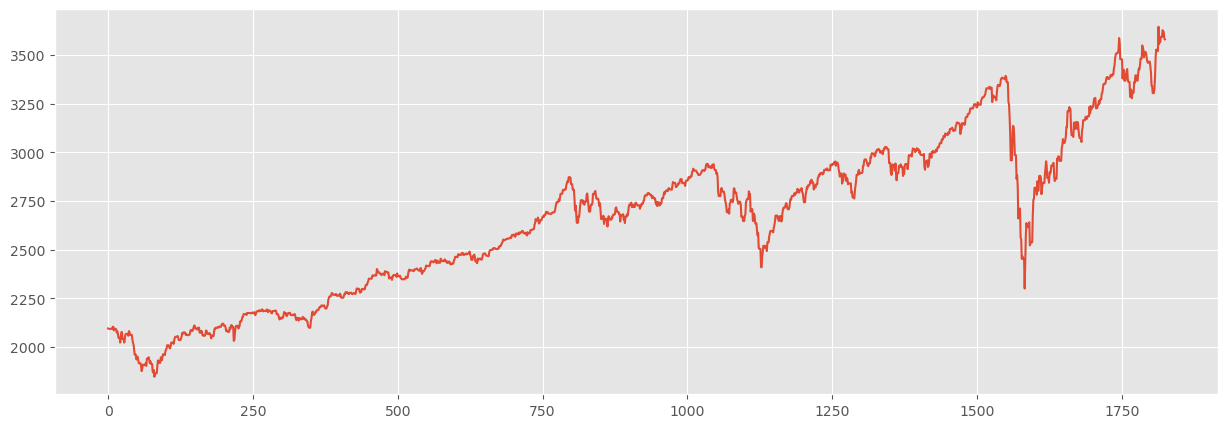

In [3]:
data.iloc[:,1].plot()

4. Проаналізуйте ряд, відповівши на 4 питання:
a. Чи є тренд?
b. Чи є сезонність?
c. Чи змінює ряд свій характер?
d. Чи є викиди або пропущені дані?

a) Ряд має зростаючий тренд

b) Ряд не має сезонності, оскільки не має періодичних змін значень ряду з часом

с) Ряд змінює свій характер, оскільки має великі коливання тренду

d) Ряд не має пропущених даних, але певні викиди спостергігаються

5. Виконайте перетворення даних для формування навчальної таблиці.
Врахуйте сезонність (якщо вона є) для вибору кількості стовпців.

In [4]:
data2= pd.DataFrame()

for i in range(180,0,-1):
    data2['t-'+str(i)] = data.iloc[:,1].shift(i)

data2['t'] = data.iloc[:,1].values

print(data2.head(225))

           t-180        t-179        t-178        t-177        t-176  \
0            NaN          NaN          NaN          NaN          NaN   
1            NaN          NaN          NaN          NaN          NaN   
2            NaN          NaN          NaN          NaN          NaN   
3            NaN          NaN          NaN          NaN          NaN   
4            NaN          NaN          NaN          NaN          NaN   
..           ...          ...          ...          ...          ...   
220  2062.540039  2062.540039  2038.199951  2021.939941  2011.709961   
221  2062.540039  2038.199951  2021.939941  2011.709961  1985.319946   
222  2038.199951  2021.939941  2011.709961  1985.319946  1960.400024   
223  2021.939941  2011.709961  1985.319946  1960.400024  1960.400024   
224  2011.709961  1985.319946  1960.400024  1960.400024  1960.400024   

           t-175        t-174        t-173        t-172        t-171  ...  \
0            NaN          NaN          NaN          NaN   

In [5]:
data3 = data2[180:]

data3.head()

,t-180,t-179,t-178,t-177,t-176,t-175,t-174,t-173,t-172,t-171,...,t-9,t-8,t-7,t-6,t-5,t-4,t-3,t-2,t-1,t
180,2095.610107,2094.120117,2093.000000,2093.000000,2093.290039,2093.290039,2093.290039,2093.810059,2103.370117,2104.270020,...,2073.989990,2066.790039,2066.790039,2066.790039,2071.879883,2065.689941,2060.610107,2044.209961,2058.350098,2058.350098
181,2094.120117,2093.000000,2093.000000,2093.290039,2093.290039,2093.290039,2093.810059,2103.370117,2104.270020,2085.000000,...,2066.790039,2066.790039,2066.790039,2071.879883,2065.689941,2060.610107,2044.209961,2058.350098,2058.350098,2058.350098
182,2093.000000,2093.000000,2093.290039,2093.290039,2093.290039,2093.810059,2103.370117,2104.270020,2085.000000,2093.840088,...,2066.790039,2066.790039,2071.879883,2065.689941,2060.610107,2044.209961,2058.350098,2058.350098,2058.350098,2055.580078
183,2093.000000,2093.290039,2093.290039,2093.290039,2093.810059,2103.370117,2104.270020,2085.000000,2093.840088,2093.840088,...,2066.790039,2071.879883,2065.689941,2060.610107,2044.209961,2058.350098,2058.350098,2058.350098,2055.580078,2079.669922
184,2093.290039,2093.290039,2093.290039,2093.810059,2103.370117,2104.270020,2085.000000,2093.840088,2093.840088,2093.840088,...,2071.879883,2065.689941,2060.610107,2044.209961,2058.350098,2058.350098,2058.350098,2055.580078,2079.669922,2094.729980


6. Розділіть дані на предиктори Х та цілі Y.

In [6]:
# Цілі -  вектор y
y = data3['t']
# Предиктори - таблиця X
X = data3.drop('t', axis=1)
data3.shape

(1645, 181)

7. Сформуйте навчальну та тестову множини.

In [7]:
X_train = X[:1465]
y_train = y[:1465]
X_test  = X[1465:]
y_test  = y[1465:]

In [8]:
print(data3.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1645, 181)
(1465, 180)
(1465,)
(180, 180)
(180,)


8. Створіть та навчіть нейронну мережу для прогнозування.

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(8, input_dim=180, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_percentage_error'])

model.fit(X_train, y_train, epochs=300, batch_size=None)

Epoch 1/300
46/46 [==============================] - 0s 561us/step - loss: 754139.5625 - mean_absolute_percentage_error: 20.0787
Epoch 2/300
46/46 [==============================] - 0s 586us/step - loss: 28325.8242 - mean_absolute_percentage_error: 4.2822
Epoch 3/300
46/46 [==============================] - 0s 575us/step - loss: 23788.4512 - mean_absolute_percentage_error: 3.8791
Epoch 4/300
46/46 [==============================] - 0s 716us/step - loss: 23664.5957 - mean_absolute_percentage_error: 3.8623
Epoch 5/300
46/46 [==============================] - 0s 672us/step - loss: 23589.7500 - mean_absolute_percentage_error: 3.9373
Epoch 6/300
46/46 [==============================] - 0s 694us/step - loss: 22214.9219 - mean_absolute_percentage_error: 3.7379
Epoch 7/300
46/46 [==============================] - 0s 672us/step - loss: 21726.4355 - mean_absolute_percentage_error: 3.6929
Epoch 8/300
46/46 [==============================] - 0s 629us/step - loss: 20967.6113 - mean_absolute_percent

9. Отримайте грубу оцінку роботи мережі на тестових даних.

In [11]:
scores = model.evaluate(X_test, y_test)
print("\n rude MAPE: %.2f%%" % (scores[1]))

6/6 [==============================] - 0s 665us/step - loss: 5023.0562 - mean_absolute_percentage_error: 1.6919

 rude MAPE: 1.69%


10. Отримайте реальну оцінку роботи мережі на тестових даних.

In [12]:
def make_prediction(X_predict, nb_of_predictions):

    predictions = numpy.array([])

    for i in range (nb_of_predictions):

        y_predicted = model.predict(X_predict)
        predictions = numpy.append(predictions, y_predicted)
    
        X_predict = numpy.roll(X_predict, -1)
        X_predict[0][-1] = y_predicted
    
    return predictions

In [13]:
X_predict = numpy.array(X_test[:1])

predictions = make_prediction(X_predict, len(X_test))

In [14]:
y_test = numpy.array(y_test)

MAPE = 100*sum(numpy.abs(y_test - predictions) / numpy.maximum(y_test, 1e-20))/len(y_test)
print(f"\n MAPE: {MAPE:.2f} %")


 MAPE: 12.54 %


11. Побудуйте суміщений графік, на якому має бути відображено:
a. відрізок ряду з навчальних (початкових) даних;
b. відрізок ряду, отриманий за допомогою опрацювання навчальних
даних нейронною мережею;
c. відрізок ряду, який відповідає реальним (початковим) даним на
тестовій множині;
d. відрізок ряду, який відповідає грубому прогнозу мережі на
тестовій множині;
e. відрізок ряду, який відповідає реальному прогнозу мережі на
тестовій множині.

In [15]:
predictions_train = model.predict(X_train)
false_predictions = model.predict(X_test)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1465, 180)
(1465,)
(180, 180)
(180,)


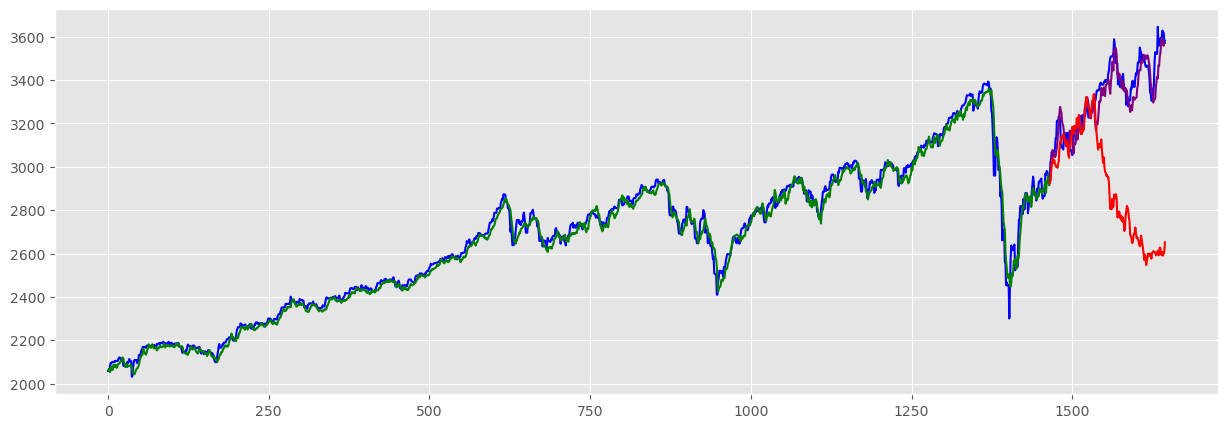

In [17]:
# Графік з результатами

plt.rcParams['figure.figsize'] = (15, 5)

#   numpy.arange([start, ]stop, [step, ]dtype=None)

x2 = numpy.arange(0, 1465, 1)

x3 = numpy.arange(1465, 1645, 1)

# реальні дані (початковий ряд без відкинутих і тестових значень)
plt.plot(x2, y_train, color='blue')

# підгонка
plt.plot(x2, predictions_train, color='green')

# реальні дані на тестовій множині
plt.plot(x3, y_test, color='blue')

# грубий прогноз на тестовій множині
plt.plot(x3, false_predictions, color='purple')

# правильний прогноз на тестовій множині
plt.plot(x3, predictions, color='red')

12. Використайте навчену мережу для отримання прогнозу на вказаний
термін часу.

In [18]:
nb_of_predictions = 90

X_real_prediction = numpy.array(data3.iloc[-X.shape[1]:,1])
X_real_prediction = numpy.expand_dims(X_real_prediction, axis = 1)
X_real_prediction = numpy.transpose(X_real_prediction)

# Робимо прогноз
real_predictions = make_prediction(X_real_prediction, nb_of_predictions)

13. Побудуйте суміщений графік початкового ряду та прогнозу.

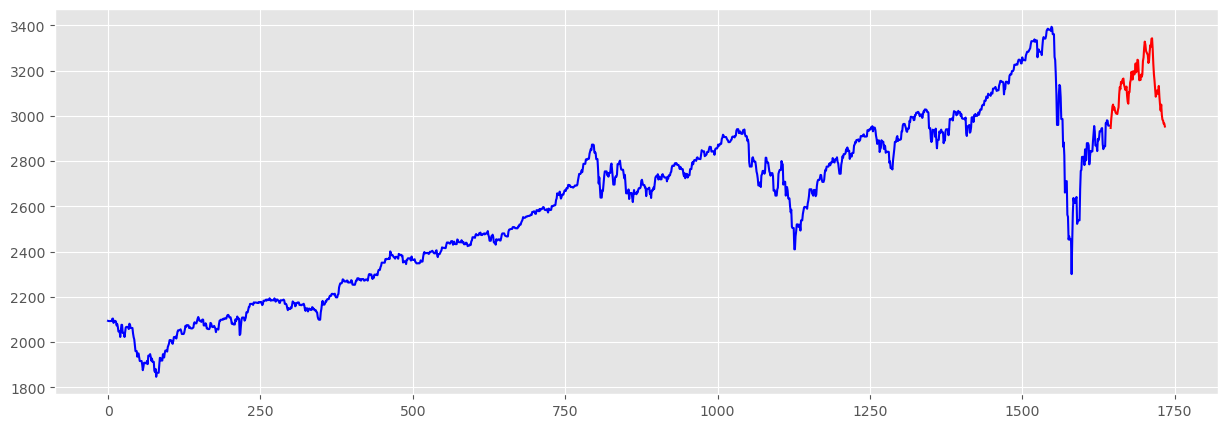

In [19]:
# Даня з початкового ряду
x_past = numpy.arange(0, len(data3))
y_past = data3.iloc[:,1]

# Додаємо координати Х для прогнозу
x_pred = numpy.arange(len(data3), len(data3) + nb_of_predictions)

# Початковий ряд
plt.plot(x_past, y_past, color='blue')

# Прогноз
plt.plot(x_pred, real_predictions, color='red')

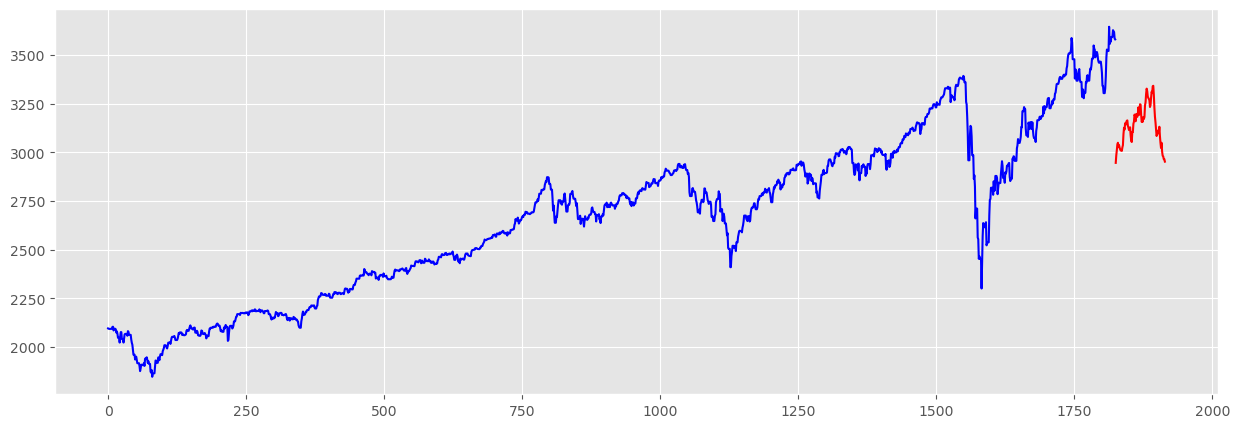

In [20]:
x_past = numpy.arange(0, len(data))
y_past = data.iloc[:,1]

x_pred = numpy.arange(len(data), len(data) + nb_of_predictions)

plt.plot(x_past, y_past, color='blue')
plt.plot(x_pred, real_predictions, color='red')